total number of CEOs =  2025
 
****************** ceo list size =  2025
score=  10.000000000000007  merging  1069 and  1525
candidate 1:  1 candidate 2:  1 after merge, total num=  2


-------------List of current combined nodes-----
 
****************** ceo list size =  2024
score=  10.000000000000005  merging  331 and  557
candidate 1:  1 candidate 2:  1 after merge, total num=  2


-------------List of current combined nodes-----
 
****************** ceo list size =  2023
score=  10.000000000000005  merging  518 and  591
candidate 1:  1 candidate 2:  1 after merge, total num=  2


-------------List of current combined nodes-----
 
****************** ceo list size =  2022
score=  10.000000000000005  merging  593 and  1231
candidate 1:  1 candidate 2:  1 after merge, total num=  2


-------------List of current combined nodes-----
 
****************** ceo list size =  2021
score=  10.000000000000005  merging  2018 and  2020
candidate 1:  2 candidate 2:  2 after merge, total num=  4




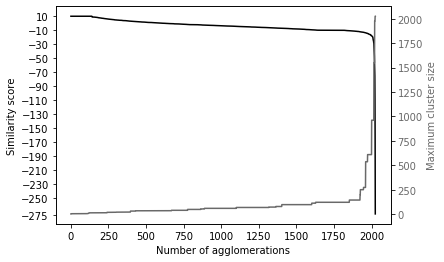

In [2]:
import pymysql
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt


class CEO_node:
  
  # 定義class attribute，所有實體會共用它
  
  # 初始化，當宣告實體的時候這個方法會被呼叫
  # 用self.xxx來定義實體的 attribute，每個被宣告的實體會有自己的attribute 
  def __init__(self, type, record_num, sequence, record_list, sequence_list, parent, left_child, right_child):
    self.type = type
    self.record_num = record_num
    #.school_id = school_id
    self.sequence = sequence
    self.record_list = record_list
    self.sequence_list = sequence_list
    self.parent = parent
    self.left_child = left_child
    self.right_child = right_child
  # 定義實體的方法
  def def_parent(self, parent):
    self.parent = parent
    
# 使用定義好的Class宣導實體(instance)
#Node1 = CEO([2, 3], None, None, None)
#Node2 = CEO([4, 5], None, None, None)
#Node3 = CEO([2, 3, 4, 5], None, Node1, Node2)
#Node1.def_parent(Node3)
#Node2.def_parent(Node3)
#print(Node3.left_child.list)
#print(Node1.parent.list)

connection = pymysql.connect(host="localhost",port=3306,user="root",password="eddie123",database="thesis")

cursor1 = connection.cursor()
cursor2 = connection.cursor()
cursor3 = connection.cursor()


#define print node content
def print_node (node):
    if node == None:
        print("Empty")
    else:
        if node.type == 1:
            print(node.school_id)
            print(node.sequence)
        else:
            print("school_list size= ", len(node.school_list))
            print(node.school_list)
            print("sequence list size= ", node.sequence_list)
            print(node.sequence_list)
            

#update ceo_node_list by removing 2 candidate nodes and add the combined node;
#add the combined node first before losing track of the candidate nodes
def merge_node(ceo_node_list, candidate1, candidate2):
    candidate_node1 = CEO_node(ceo_node_list[candidate1].type, ceo_node_list[candidate1].record_num, ceo_node_list[candidate1].sequence, ceo_node_list[candidate1].record_list, ceo_node_list[candidate1].sequence_list, ceo_node_list[candidate1].parent, ceo_node_list[candidate1].left_child, ceo_node_list[candidate1].right_child)
    candidate_node2 = CEO_node(ceo_node_list[candidate2].type, ceo_node_list[candidate2].record_num, ceo_node_list[candidate2].sequence, ceo_node_list[candidate2].record_list, ceo_node_list[candidate2].sequence_list, ceo_node_list[candidate2].parent, ceo_node_list[candidate2].left_child, ceo_node_list[candidate2].right_child)

    record_list = []
    #put node1 school (school_list) in combined list first
    if candidate_node1.type == 1:
        record_list.append(candidate_node1.record_num)
    else:
        record_list = candidate_node1.record_list

    print("candidate 1: ", len(record_list), end = ' ')
    #for i in range (0, len(record_list)):
         #print(ceo_recordnum_school_list[record_list[i]], end = ' ')
    
    print("candidate 2: ", end = ' ')
    #put node2 school (school_list) in combined list too
    if candidate_node2.type == 1:
        record_list.append(candidate_node2.record_num)
        print("1", end = ' ')
        #print(ceo_recordnum_school_list[candidate_node2.record_num])
    else:
        record_list.extend(candidate_node2.record_list)
        print(len(candidate_node2.record_list), end = ' ')
        #for i in range (0, len(candidate_node2.record_list)):
            #print(ceo_recordnum_school_list[candidate_node2.record_list[i]], end = ' ')

    #print("school after merged with candidate2: ")
    print("after merge, total num= ", len(record_list))
    #for i in range (0, len(record_list)):
       # print(ceo_recordnum_school_list[record_list[i]], end = ' ')
    
    #create sequence_list for combined node similarly
    sequence_list = []
    if candidate_node1.type == 1:
        sequence_list.append(candidate_node1.sequence)
    else:
        sequence_list = candidate_node1.sequence_list
        
    if candidate_node2.type == 1:
        sequence_list.append(candidate_node2.sequence)
    else:
        sequence_list.extend(candidate_node2.sequence_list)
        
    left_child = candidate_node1
    right_child = candidate_node2
    
    new_node = CEO_node (2, None, None, record_list, sequence_list, None, left_child, right_child)
    return new_node
                         
# build cluster tree using optimal matching distance with 2 lists
# Use these values to calculate scores
gap_penalty = -1
match_award = 1
mismatch_penalty = -1

# A function for making a matrix of zeroes
def zeros(rows, cols):
    # Define an empty list
    retval = []
    # Set up the rows of the matrix
    for x in range(rows):
        # For each row, add an empty list
        retval.append([])
        # Set up the columns in each row
        for y in range(cols):
            # Add a zero to each column in each row
            retval[-1].append(0)
    # Return the matrix of zeros
    return retval

# A function for determining the score between any two bases in alignment
def match_score(weight1, weight2, alpha1, alpha2, beta1, beta2):
    if alpha1 == beta1 and alpha1 != 'H' and alpha2 == beta2 and alpha2 !='3':
        #return 1.0*weight1
        return 1.25*weight1
    elif alpha1 == beta1 and alpha1 != 'H' and alpha2 == beta2 and alpha2 == '3':
        #return 1.0*weight1
        return 1.0*weight1
    elif alpha1 == beta1 and alpha1 != 'H' and alpha2 == '1' and beta2 == '2':
        #return 1.0*weight1
        return 1.2*weight1
    elif alpha1 == beta1 and alpha1 != 'H' and alpha2 == '2' and beta2 == '1':
        #return 1.0*weight1
        return 1.2*weight1
    elif alpha1 == beta1 and alpha1 != 'H' and alpha2 !=  beta2:
        #return 1.0*weight1
        return 1.0*weight1
    elif alpha1 == beta1 and alpha1 == 'H' and alpha2 == beta2 and alpha2 != '3':
        #return -0.75*weight1
        return -0.75*weight1
    elif alpha1 == beta1 and alpha1 == 'H' and alpha2 == beta2 and alpha2 == '3':
        #return -0.75*weight1
        return -1*weight1
    elif alpha1 == beta1 and alpha1 == 'H' and alpha2 == '1' and beta2 == '2':
        #return -0.75*weight1
        return -0.8*weight1
    elif alpha1 == beta1 and alpha1 == 'H' and alpha2 == '2' and beta2 == '1':
        #return -0.75*weight1
        return -0.8*weight1
    elif alpha1 == beta1 and alpha1 == 'H' and alpha2 != beta2:
        #return -0.75*weight1
        return -1*weight1
    elif alpha1 == '-' or beta1 == '-':
        return -2*weight1*weight2
    elif alpha1 != beta1 and alpha2 == beta2 and alpha2 != '3':
        #return -1.0*weight1
        return -0.75*weight1
    elif alpha1 != beta1 and alpha2 == beta2 and alpha2 == '3':
        #return -1.0*weight1
        return -1*weight1
    elif alpha1 != beta1 and alpha2 != beta2 and alpha2 == '1' and beta2 == '2':
        #return -1.0*weight1
        return -0.8*weight1
    elif alpha1 != beta1 and alpha2 != beta2 and alpha2 == '2' and beta2 == '1':
        #return -1.0*weight1
        return -0.8*weight1
    elif alpha1 != beta1 and alpha2 != beta2 and (alpha2 == '3' or beta2 == '3'):
        return -1*weight1
    else:
        print("exception")
        return 0

def needleman_wunsch(seq1, seq2):
    
    # Store length of two sequences
    n = int(len(seq1)/2) 
    m = int(len(seq2)/2)

    #calculate the average year of two career path
    length_weight = 20.0 / (float(n) + float(m))
    
    # Generate matrix of zeros to store scores
    score = zeros(m+1, n+1)
    
    # Calculate score table
    
    # Fill out first column
    for i in range(0, m + 1):
        score[i][0] = gap_penalty * i
    
    # Fill out first row
    for j in range(0, n + 1):
        score[0][j] = gap_penalty * j
    
    # Fill out all other values in the score matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # Calculate the score by checking the top, left, and diagonal cells
 #           match = score[i - 1][j - 1] + match_score(seq1[j-1], seq1[j], seq2[i-1], seq2[i])
            match = score[i - 1][j - 1] + match_score(length_weight, 1.0, seq1[2*(j - 1)], seq1[2*j - 1], seq2[2*(i - 1)], seq2[2*i - 1])
            delete = score[i - 1][j] + gap_penalty
            insert = score[i][j - 1] + gap_penalty
            # Record the maximum score from the three possible scores calculated above
            score[i][j] = max(match, delete, insert)
    
    # Traceback and compute the alignment 
    
    # Create variables to store alignment
    align1 = ""
    align2 = ""
    
#print("score %.2f" % score[m][n])
    final_score = score[m][n]
    
    # Start from the bottom right cell in matrix
    i = m
    j = n
    
    # We'll use i and j to keep track of where we are in the matrix, just like above
    while i > 0 and j > 0: # end touching the top or the left edge
        score_current = score[i][j]
        score_diagonal = score[i-1][j-1]
        score_up = score[i][j-1]
        score_left = score[i-1][j]
        
        # Check to figure out which cell the current score was calculated from,
        # then update i and j to correspond to that cell.
        if score_current == score_diagonal + match_score(length_weight, 1.0, seq1[2*(j-1)], seq1[2*j - 1], seq2[2*(i-1)], seq2[2*i - 1]):
            align1 += seq1[2*j - 1]
            align1 += seq1[2*(j - 1)]
            align2 += seq2[2*i - 1]
            align2 += seq2[2*(i - 1)]
            i -= 1
            j -= 1
        elif score_current == score_up + gap_penalty:
            align1 += seq1[2*j - 1]
            align1 += seq1[2*(j - 1)]
            align2 += '-'
            j -= 1
        elif score_current == score_left + gap_penalty:
            align1 += '-'
            align2 += seq2[2*i - 1]
            align2 += seq2[2*(i -1)]
            i -= 1
   
    # Finish tracing up to the top left cell
    while j > 0:
        align1 += seq1[2*j - 1]
        align1 += seq1[2*(j - 1)]
        align2 += '-'
        j -= 1
    while i > 0:
        align1 += '-'
        align2 += seq2[2*j - 1]
        align2 += seq2[2*(i - 1)]
        i -= 1
    
    # Since we traversed the score matrix from the bottom right, our two sequences will be reversed.
    # These two lines reverse the order of the characters in each sequence.
    align1 = align1[::-1]
    align2 = align2[::-1]   
    return(final_score, align1, align2)

#define find_centroid
def find_centroid (ceo_node_list, index):
    cluster_size = len(ceo_node_list[index].record_list)
    #get the optimal matching score between any two nodes
    w, h = cluster_size, cluster_size
    distance_lookup = [[0 for i in range(w)] for j in range(h)]
    for i in range(0, cluster_size-1):
        for j in range(i+1, cluster_size):
            current_score, output1, output2 = needleman_wunsch(ceo_node_list[index].sequence_list[i], ceo_node_list[index].sequence_list[j])
            distance_lookup[i][j] = current_score
            distance_lookup[j][i] = current_score
    #calculate the average distance for all nodes
    best_id = 0
    max = -1000
    for i in range(0, cluster_size):
        sum = 0
        for j in range(0, cluster_size):
            sum = sum + distance_lookup[i][j]
        if sum > max:
            best_id = i
            max = sum

    print("centroid schoolid = ", ceo_recordnum_school_list[ceo_node_list[index].record_list[best_id]])
    print("centroid sequence = ", ceo_node_list[index].sequence_list[best_id])
    
    #print all school_ID & Sequences if needed
    #("School ID & Sequences:")
    #for i in range(0, cluster_size):
         #print(ceo_recordnum_school_list[ceo_node_list[index].record_list[i]], ":", ceo_node_list[index].sequence_list[i])
        
    

#put all CEOs in the first list
sql = "SELECT * from careerpath_Sequence"
cursor2.execute(sql)

ceo_recordnum_school_list=[]
ceo_node_list = []
record = cursor2.fetchone()
while record != None:
    #create a list of school_id based on record_num 
    ceo_recordnum_school_list.append(record[1])
    new_node = CEO_node (1, record[0], record[2], None, None, None, None, None)
    ceo_node_list.append(new_node)
    record = cursor2.fetchone()


list1_size = len(ceo_node_list)
print("total number of CEOs = ", list1_size)

#define lists for ploting graph
plot_x =[]
plot_y =[]
plot_max_num_node_y=[]

#get the optimal matching score between any two nodes
w, h = 2030, 2030
score_lookup = [[0 for i in range(w)] for j in range(h)]
for i in range(0, list1_size-1):
    for j in range(i+1, list1_size):
        current_score, output1, output2 = needleman_wunsch(ceo_node_list[i].sequence, ceo_node_list[j].sequence)
        score_lookup[ceo_node_list[i].record_num][ceo_node_list[j].record_num] = current_score
        score_lookup[ceo_node_list[j].record_num][ceo_node_list[i].record_num] = current_score

    
        
# start off from an empty cluster node list
ceo_cluster_node_list = []

#df = pd.read_excel(r'c:/users/admin/desktop/stream.xlsx')
#np = df['Clickstream'].to_numpy()

#find the highest score between nodes from CEO_LIST
while len(ceo_node_list) != 1:
    #define new x coordinate for plotting graph
    plot_x.append(2026-len(ceo_node_list))
    
    best_score = -1000
    print(" ")
    print("****************** ceo list size = ", len(ceo_node_list))
    for i in range(0, len(ceo_node_list)-1):
        for j in range(i+1, len(ceo_node_list)):
            if ceo_node_list[i].type == 1 and ceo_node_list[j].type == 1:
                #both nodes are single person
                #current_score, output1, output2 = needleman_wunsch(ceo_node_list[i].sequence, ceo_node_list[j].sequence)
                current_score = score_lookup[ceo_node_list[i].record_num][ceo_node_list[j].record_num]
                if current_score > best_score:
                    best_score = current_score
                    candidate1 = i
                    candidate2 = j
            elif ceo_node_list[i].type == 1 and ceo_node_list[j].type == 2:
                #node i is single person and node j is multiple persons
                #get the list size first
                list_size = len(ceo_node_list[j].record_list)
                group_score = 100
                for k in range(0, list_size):
                    if score_lookup[ceo_node_list[i].record_num][ceo_node_list[j].record_list[k]] < group_score:
                        group_score = score_lookup[ceo_node_list[i].record_num][ceo_node_list[j].record_list[k]]
                    
                #update the best score if group max is better
                if group_score > best_score:
                        best_score = group_score
                        candidate1 = i
                        candidate2 = j
            elif ceo_node_list[i].type == 2 and ceo_node_list[j].type == 1:
                #node i is multiple person and node j is single
                #get the list size first
                list_size = len(ceo_node_list[i].record_list)
                group_score = 100
                for k in range(0, list_size):
                    if score_lookup[ceo_node_list[i].record_list[k]][ceo_node_list[j].record_num] < group_score:
                        group_score = score_lookup[ceo_node_list[i].record_list[k]][ceo_node_list[j].record_num]
                #update best_score if group_score max is better
                if group_score > best_score:
                        best_score = group_score
                        candidate1 = i
                        candidate2 = j
            else:
                #both node i and node j are multiple persons
                #get the size of both lists first
                list_size1 = len(ceo_node_list[i].record_list)
                list_size2 = len(ceo_node_list[j].record_list)
                group_score = 100
                for k1 in range(0, list_size1):
                    for k2 in range(0, list_size2):
                        if score_lookup[ceo_node_list[i].record_list[k1]][ceo_node_list[j].record_list[k2]] < group_score:
                            group_score = score_lookup[ceo_node_list[i].record_list[k1]][ceo_node_list[j].record_list[k2]]
                #update best_score if group max is better
                if group_score > best_score:
                            best_score = group_score
                            candidate1 = i
                            candidate2 = j
    
    #update ceo_node_list by removing 2 candidate nodes and add the combined node;
    #add the combined node first before losing track of the candidate nodes
    print("score= ", best_score, " merging ", candidate1,"and ", candidate2)
    ceo_node_list.append(merge_node(ceo_node_list, candidate1, candidate2))
    # define y cooridinate for plotting
    plot_y.append(best_score)
    
    #find centroid if score > 2 to save time
    #if best_score > 2:
        #list_length_after_append = len(ceo_node_list)
        #find_centroid (ceo_node_list, list_length_after_append-1)

    #delete two nodes    
    del ceo_node_list[candidate2]
    del ceo_node_list[candidate1]
    
    #print all the non-single node & its centroid infomation
    list_length_after_append = len(ceo_node_list)
    
    print("")
    print("")
    print("-------------List of current combined nodes-----")

    max_num_node = 0
    for i in range(0, list_length_after_append):
        if ceo_node_list[i].type == 2:
            #print the number of nodes in each non-single node the its centroid info
            #print("# of nodes = ", len(ceo_node_list[i].record_list))
          
            #find the maximum number of nodes for plotting
            if len(ceo_node_list[i].record_list) > max_num_node:
              max_num_node = len(ceo_node_list[i].record_list)
          
            #take too much time, disabled for now
            #find_centroid (ceo_node_list, i)
            #print("node id in list= ", i)
                                                                                
            #print("cluster size= ", len(ceo_node_list[i].record_list))                                                                    
            # print all ids and sequences in the non-single node
            #if list_length_after_append == 1561:
                #for j in range(0, len(ceo_node_list[i].record_list)):
                    #print(ceo_recordnum_school_list[ceo_node_list[i].record_list[j]], " ", ceo_node_list[i].sequence_list[j])
        
    plot_max_num_node_y.append(max_num_node)

#draw graph with two y scales and labels
figure, ax1 = plt.subplots()

#plotting the number of cluster graph
plt.plot(plot_x, plot_y, color='black')
ax1.set_ylabel('Similarity score')

ax1.set_xlabel('Number of agglomerations', color = 'black')
ax1.tick_params(axis = 'y', labelcolor = 'black')
ax1.set_yticks([-275, -250, -230, -210, -190, -170, -150, -130, -110, -90, -70, -50, -30, -10, 10])
#plt.title('(Botton-up merging , Similarity) Graph')

#number of nodes subgraph using second y scale
ax2 = ax1.twinx()
#plotting the maxium 
plt.plot(plot_x, plot_max_num_node_y, color='dimgray')
ax2.tick_params(axis = 'y', labelcolor = 'dimgray')
ax2.set_ylabel('Maximum cluster size', color = 'dimgray')
plt.show()